In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
sns.set_context("poster")


In [3]:
path = "results/linear_multi"
# path = "results/nonlinear_multi"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_1.csv', 'results/linear_multi\\linear_dgp_10.csv', 'results/linear_multi\\linear_dgp_11.csv', 'results/linear_multi\\linear_dgp_12.csv', 'results/linear_multi\\linear_dgp_13.csv', 'results/linear_multi\\linear_dgp_14.csv', 'results/linear_multi\\linear_dgp_15.csv', 'results/linear_multi\\linear_dgp_16.csv', 'results/linear_multi\\linear_dgp_17.csv', 'results/linear_multi\\linear_dgp_18.csv', 'results/linear_multi\\linear_dgp_19.csv', 'results/linear_multi\\linear_dgp_2.csv', 'results/linear_multi\\linear_dgp_20.csv', 'results/linear_multi\\linear_dgp_21.csv', 'results/linear_multi\\linear_dgp_22.csv', 'results/linear_multi\\linear_dgp_23.csv', 'results/linear_multi\\linear_dgp_24.csv', 'results/linear_multi\\linear_dgp_25.csv', 'results/linear_multi\\linear_dgp_26.csv', 'results/linear_multi\\linear_dgp_27.csv', 'results/linear_multi\\linear_dgp_28.csv', 'results/linear_multi\\linear_dgp_29.csv', 'results/linear_multi\\linear_dgp_3.csv', 'results/line

In [4]:
extracted_numbers = [re.findall(r'\d+', s) for s in all_file]
first_numbers = [int(numbers[0]) if numbers else None for numbers in extracted_numbers]
first_numbers.sort()
first_numbers

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [5]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx   mean  median   true   bias    std   RMSE    MAE   MAPE   q025  \
0      1.0  1.186   1.186  1.204 -0.018  0.036  0.041  0.033  0.027  1.114   
1      1.0  1.178   1.177  1.204 -0.026  0.046  0.053  0.042  0.035  1.090   
2      1.0  3.697   3.697  3.751 -0.054  0.112  0.124  0.099  0.026  3.476   
3      1.0  3.549   3.552  3.751 -0.202  0.166  0.261  0.219  0.058  3.223   
4      1.0  0.853   0.853  1.204 -0.351  0.066  0.357  0.351  0.292  0.722   
..     ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
155  306.0  2.362   2.364  3.416 -1.054  0.225  1.077  1.054  0.308  1.916   
156  306.0  0.999   0.998  1.041 -0.042  0.039  0.057  0.048  0.046  0.921   
157  306.0  0.945   0.946  1.041 -0.096  0.058  0.112  0.098  0.094  0.827   
158  306.0  3.255   3.253  3.416 -0.161  0.127  0.205  0.173  0.051  3.002   
159  306.0  2.966   2.970  3.416 -0.450  0.231  0.506  0.453  0.133  2.505   

      q975  covering           method estimand   model      typ

In [6]:
combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']] = combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']].apply(pd.to_numeric, errors='coerce')

In [7]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [9]:
def coverage_perc(x):
    return np.mean(x)*100

df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean'],
                                         'median' : ['mean'],
                                         'std' : ['mean'],
                                         'bias' : ['mean'],
                                         'true' : ['mean'],
                                         'RMSE' : ['mean'],
                                         'MAE' : ['mean'],
                                         'MAPE' : ['mean'],
                                         'q025' : ['mean'],
                                         'q975' : ['mean'],
                                         'ci_length' : ['mean'],
                                         'covering' : [coverage_perc]}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


,estimand,model,type,mean,median,std,bias,true,RMSE,MAE,MAPE,q025,q975,ci_length,covering
,,,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,coverage_perc
0,dynamic,GP,1S,0.922223,0.923767,0.065847,-0.077167,0.999390,0.114427,0.099237,0.099930,0.786913,1.048693,0.261780,71.000000
1,dynamic,GP,3S,0.737480,0.741017,0.075270,-0.261910,0.999390,0.273113,0.262047,0.261627,0.580057,0.876167,0.296110,2.000000
2,dynamic,GP,Obs.,0.598383,0.598393,0.075190,-0.401007,0.999390,0.413537,0.405913,0.403710,0.450887,0.745790,0.294903,5.333333
3,dynamic,GP,Oracle,0.957673,0.958413,0.044007,-0.041717,0.999390,0.067750,0.057317,0.057773,0.868520,1.042613,0.174093,86.333333
4,dynamic,Linear,1S,0.989653,0.989637,0.040267,-0.009737,0.999390,0.061930,0.052903,0.053473,0.910153,1.068703,0.158550,86.333333
5,dynamic,Linear,3S,0.872350,0.872347,0.052940,-0.127040,0.999390,0.139353,0.129170,0.128737,0.770963,0.977087,0.206123,31.333333
6,dynamic,Linear,Obs.,0.748323,0.748393,0.061377,-0.251067,0.999390,0.262553,0.254173,0.251237,0.627323,0.868690,0.241367,13.000000
7,dynamic,Linear,Oracle,0.998880,0.998803,0.033330,-0.000510,0.999390,0.044203,0.036673,0.036853,0.933077,1.064350,0.131273,95.333333
8,stoch,GP,1S,3.192413,3.198823,0.259050,-0.405200,3.597617,0.508883,0.450777,0.125407,2.666333,3.683873,1.017540,60.000000


Text(0, 0.5, '')

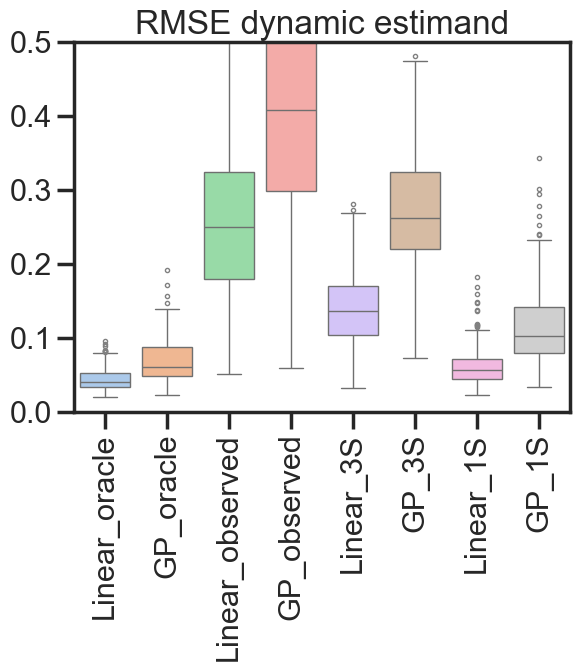

In [10]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

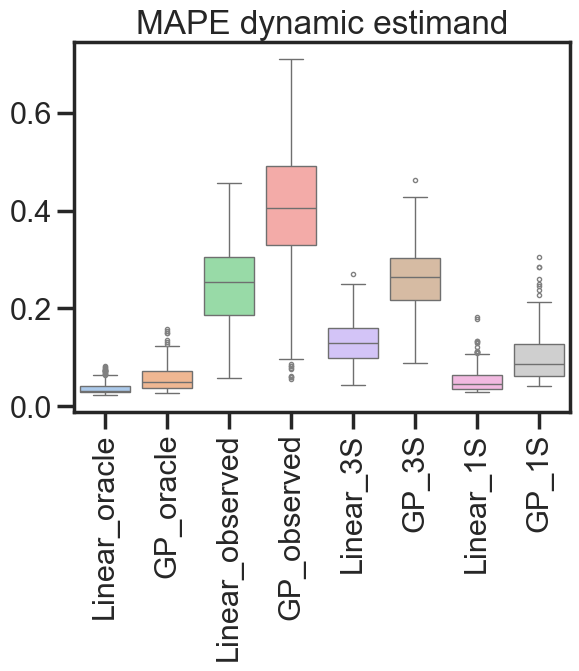

In [12]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAPE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

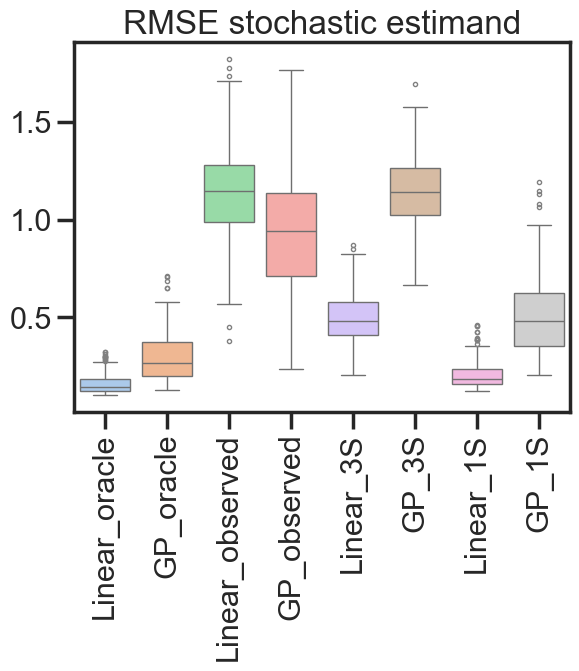

In [14]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

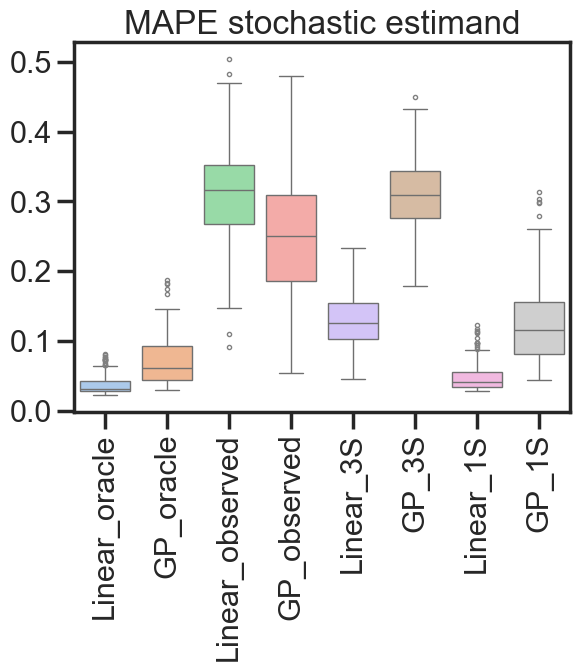

In [15]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'MAPE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE stochastic estimand")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

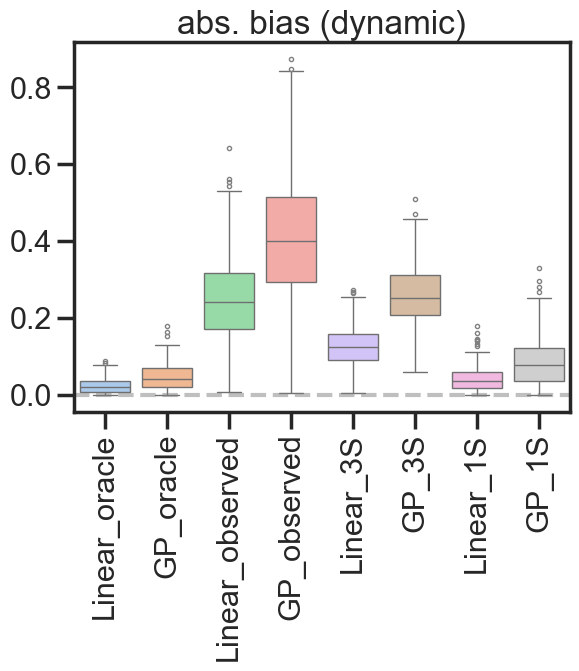

In [17]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

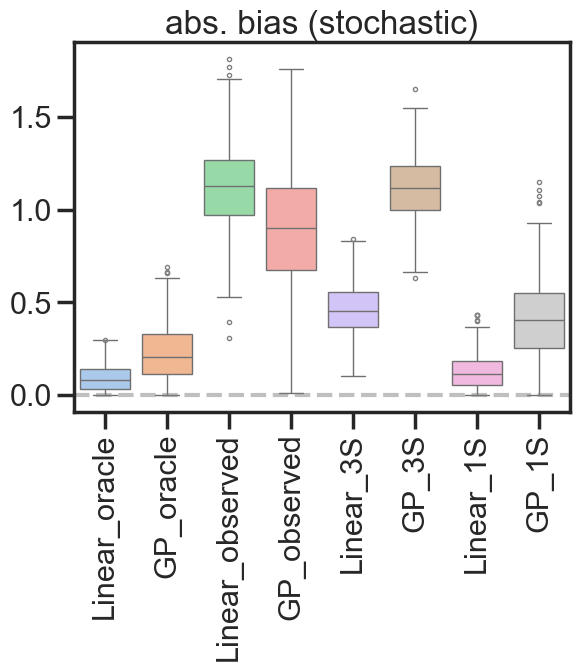

In [18]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

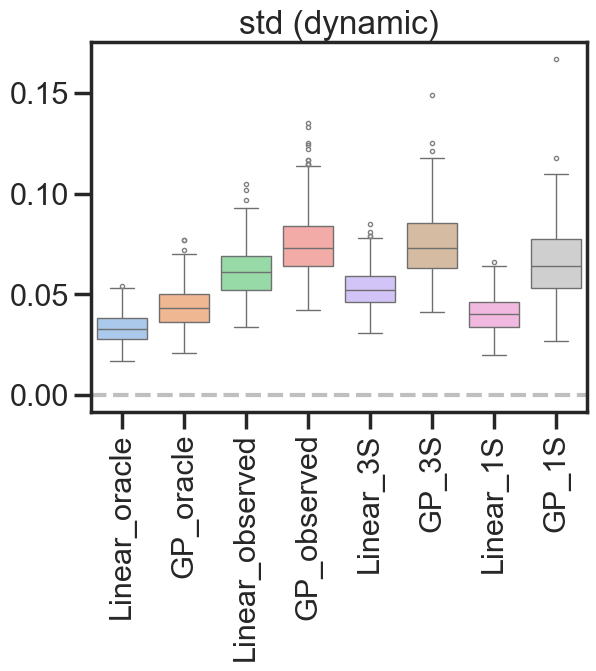

In [19]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
# plt.ylim(0,.2)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

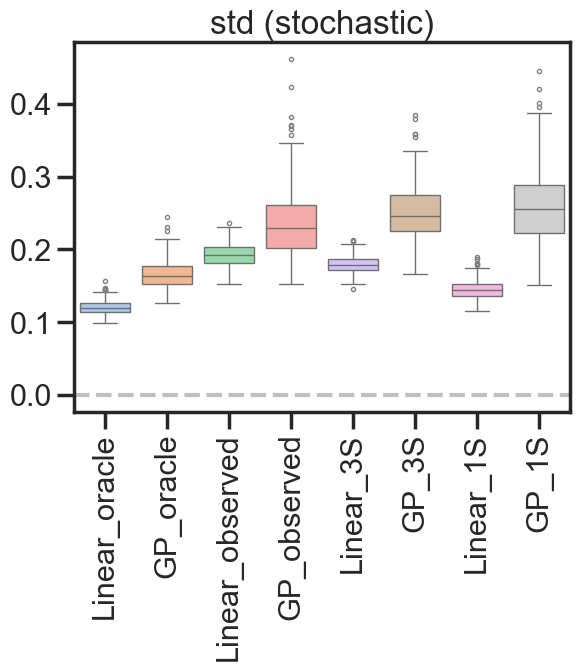

In [20]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
# plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")